#### Convex set `definition`

For any $x_1, x_2 \in S$, then for $\alpha\in [0, 1]$

$$x=\alpha x_1+(1-\alpha)x_2\in S$$

Intuitively, if a set is convex, for any two points in the set that we draw, the `line segment` between them is also in the set

`Notation`: $S$ refers to an `arbitrary set`, $S^n$ refers to the set of  $n \times n$ `symmetric matrices`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

#### `Typical` convex set

##### Convex hull

Set of `all convex combinations` of points in a set

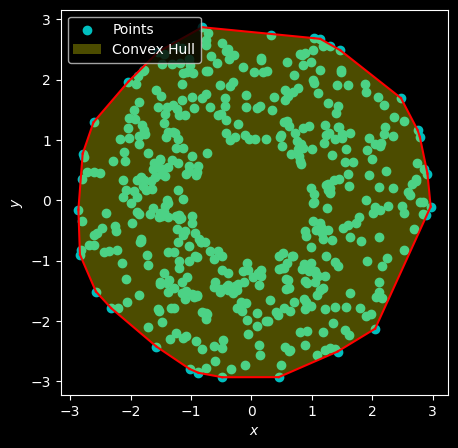

In [ ]:
inner_radius = 1
outer_radius = 3
num_points = 500

angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.random.uniform(inner_radius, outer_radius, num_points)
x_points = radii * np.cos(angles)
y_points = radii * np.sin(angles)

points = np.vstack((x_points, y_points)).T

hull = ConvexHull(points)

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], label='Points', color='c')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')

plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'yellow', alpha=0.3, label='Convex Hull')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

##### `Conic` cone

Two point scenario, could be generalized to higher number of points

$$\{x|x=\alpha_1 x_1 + \alpha_2 x_2, \alpha_1, \alpha_2 \in S, \alpha_i \geq 0\}$$

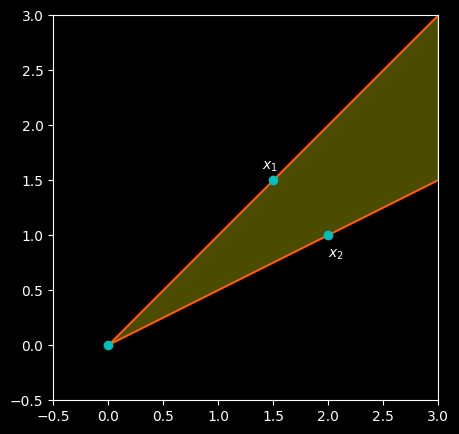

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(5, 5))

three_pts = np.array([[0, 0],[1.5, 1.5], [2, 1]])
ax_1.scatter(three_pts[:, 0], three_pts[:, 1], color='c',zorder=2)

ax_1.text(1.4, 1.6, '$x_1$')
ax_1.text(2, 0.8, '$x_2$')


ax_1.plot([0, 10], [0, 10], 'r-',zorder=-2)
ax_1.plot([0, 10], [0, 5], 'r-',zorder=-2)

ax_1.set_xlim(-0.5, 3)
ax_1.set_ylim(-0.5, 3)
ax_1.set_aspect('equal')

polygon_points = np.array([[0, 0], [3, 3], [3, 1.5]])
ax_1.fill(polygon_points[:, 0], polygon_points[:, 1], color='yellow', alpha=0.3)

plt.show()

`Polar` cone

$$S=\{z|z^Tx\leq 0, \forall x \in S\}$$

That is, all vectors having an angle larger or equal to 90 deg with every vector in the cone

##### `Positive semidefinite` cone

Set of all positive semidefinite matrices

Use 2D case, for a 2 x 2 (generally symmetric by design) matrix $A$ to be positive semidefinite, for any vector $x$, $x^TAx \geq 0$ holds

This condition can be represented in terms of its eigenvalues being non-negative

For

$$A=\begin{bmatrix} a & b \\ b & c
\end{bmatrix}$$

It is positive semidefinite if $a, c \geq 0$ and $ac-b^2 \geq 0$

To show this, we express eigenvalue $\lambda$ by solving characteristic equation

$$\det (A-\lambda I)=0$$

where

$$\det (A-\lambda I)=\det \left(\begin{bmatrix} a-\lambda & b \\ b & c- \lambda\end{bmatrix}\right)$$

Then

$$(a-\lambda)(c-\lambda)-b^2=0$$

and we have

$$\lambda^2 -(a+c)\lambda + (ac-b^2) = 0$$

and

$$\lambda=\frac{(a+c)\pm \sqrt{(a+c)^2-4(ac-b^2)}}{2}$$

From numerator, we see that if $a, c\geq 0$ and $ac-b^2\geq 0$, the eigenvalue must be non-negative

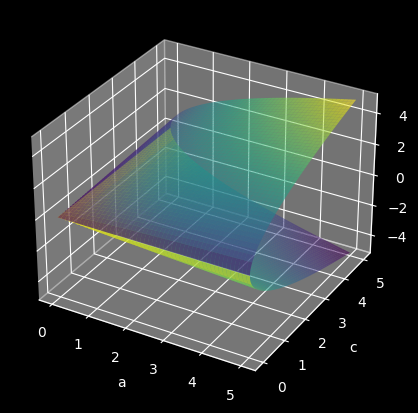

In [ ]:
# Grid with a, c non-negative
a = np.linspace(0, 5, 400)
c = np.linspace(0, 5, 400)
A, C = np.meshgrid(a, c)

# b^2 = ac for positive semidefinite condition
B_positive = np.sqrt(A * C)
B_negative = -np.sqrt(A * C)

# Plot positive semidefinite region in 3D
fig_2 = plt.figure(figsize=(6, 5))
ax_2 = fig_2.add_subplot(111, projection='3d')

ax_2.plot_surface(A, C, B_positive, cmap='viridis', alpha=0.6, edgecolor='none')
ax_2.plot_surface(A, C, B_negative, cmap='viridis', alpha=0.6, edgecolor='none')

ax_2.set_xlabel('a')
ax_2.set_ylabel('c')
ax_2.set_zlabel('b')

plt.show()

##### `Hyperplane`

$$\{x\in \mathbf{R}^n| a^Tx=b\}$$

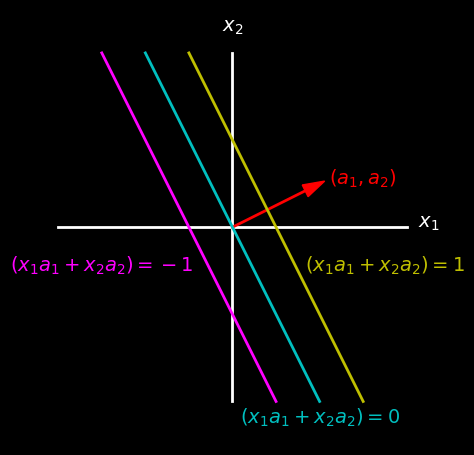

In [ ]:
fig_3, ax_3 = plt.subplots(figsize=(5, 5))

ax_3.plot([-4, 4], [0, 0], 'w', linewidth=2, zorder=0)
ax_3.plot([0, 0], [-4, 4], 'w', linewidth=2, zorder=0)

ax_3.text(0, 4.5, r"$x_2$", horizontalalignment='center',fontsize=14)
ax_3.text(4.5, 0, r"$x_1$", horizontalalignment='center',fontsize=14)

ax_3.plot([0, 2], [0, 1], 'r', linewidth=2, zorder=0)
ax_3.arrow(2-0.5*2/3, 1-0.5/3, 0.002, 0.001, head_width=0.3, head_length=0.5, color='r')
ax_3.text(3, 1, r"$(a_1, a_2)$", horizontalalignment='center',fontsize=14, color='r')

ax_3.plot([-2, 2], [4, -4], 'c', linewidth=2, zorder=0)
ax_3.text(2, -4.5, r"$(x_1a_1+x_2a_2)=0$", horizontalalignment='center',fontsize=14, color='c')

ax_3.plot([-2+1, 2+1], [4, -4], 'y', linewidth=2, zorder=0)
ax_3.text(3.5, -1, r"$(x_1a_1+x_2a_2)=1$", horizontalalignment='center',fontsize=14, color='y')

ax_3.plot([-2-1, 2-1], [4, -4], 'magenta', linewidth=2, zorder=0)
ax_3.text(-3, -1, r"$(x_1a_1+x_2a_2)=-1$", horizontalalignment='center',fontsize=14, color='magenta')

ax_3.set_xlim(-5, 5)
ax_3.set_ylim(-5, 5)
ax_3.set_aspect('equal')

ax_3.axis("off")
plt.tight_layout()

plt.show()

The above shows the 2D case of `hyperplanes`, which are just lines, using the concept of dot product

* we can find when $a^Tx$ `equals one`
* it is not very difficult to see that for all $(x_1, x_2)$ on one of these parallel lines, the dot product $x_1a_1+x_2a_2$ is a `constant`, but where are the lines that make the dot product `integer` values?
* the case of $a^Tx=0$ is simple, just a line perpendicular to $(a_1, a_2)$ and passes through the `origin`
* for case of $a^Tx=1$, we recall `concept of dot product` between $(x_1, x_2)$ and $(a_1, a_2)$ is the signed projection length of $(x_1, x_2)$ in the direction of $(a_1, a_2)$, which is then `scaled` by length of $(a_1, a_2)$
* since the signed projection length of $(x_1, x_2)$ in the direction of $(a_1, a_2)$ is just the signed distance $d$ between two parallel lines, which gives

$$d\cdot\|(a_1, a_2)\|=x_1a_1+x_2a_2$$

Finally, we `set the dot product to 1`, to get the distance $d$ between two adjacent parallel lines where $b$ takes integer values

$$\boxed{d=\frac{x_1a_1+x_2a_2}{\|(a_1, a_2)\|}=\frac{1}{\|(a_1, a_2)\|}}$$

We see this is a reciprocal relationship, the larger the $\|a\|$ is, the denser the parallel lines are

##### `Halfspace`

Once we have the hyperplane

$$H=\{x\in \mathbf{R}^n| a^Tx=b\}$$

then, halfspace is just everything `on one side of it`

$$H^+=\{x\in \mathbf{R}^n| a^Tx\geq b\}$$

and

$$H^-=\{x\in \mathbf{R}^n| a^Tx\leq b\}$$

##### Other examples

* Euclidean ball: $\{x| \|x-x_c\|\leq r\}$
* Ellipsoid: $\{x|(x-x_c)^TP^{-1}(x-x_c)\leq 1\}$
* Polyhedra: intersection of `finite number` of halfspaces and hyperplanes

#### Operations `preserving convexity`

* Intersection
* Affine transform (ex: scaling, translation, projection...)
* Perspective transform

$$f: \mathbf{R}^n \rightarrow \mathbf{R}^{n-1}, f(x_1,\cdots, x_{n-1}, x_n)=[\frac{x_1}{x_n}, \cdots, \frac{x_{n-1}}{x_n}], x_n > 0$$
* Linear fractional transform
$$\frac{Ax+b}{c^Tx+d}$$
where $c^Tx+d>0$

#### Generalized `inequalities`

A convex cone $K\in \mathbf{R}^n$ is a `proper cone` if it is
* closed (contains its boundary)
* solid (nonempty interior)
* pointed (contains no line)

Examples
* nonnegative orthant: $K=\mathbf{R}^n_+$
* positive semidefinite cone: $K=S^n_+$
* nonnegative polynomials on $[0, 1]$
$$K=\{x\in \mathbf{R}^n|x_1+x_2t+\cdots+x_nt^{n-1}\geq 0\}, \forall t\in [0,1]$$

`Generalized inequality` defined by a proper cone $K$

$$x\leq_K y \Longleftrightarrow y-x\in K, \,\,x<_K y \Longleftrightarrow y-x\in \text{int}K$$

Examples
* $x\leq_{R^n_+}y \Longleftrightarrow x_i\leq y_i, i=1,\cdots, n$
* $X\leq_{S^n_+} Y \Longleftrightarrow Y-X\in S^n_+$
* $x\leq_K y, u\leq_K v \Rightarrow x+u\leq_K y+v$

#### `Minimum` element

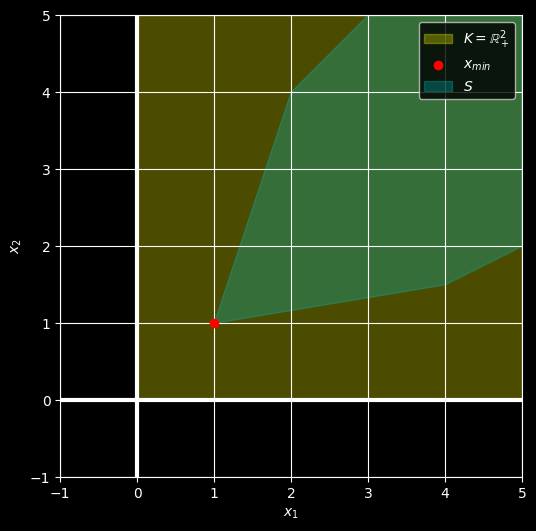

In [ ]:
fig_4, ax_4 = plt.subplots(figsize=(6, 6))

# Proper cone C (R_+^2)
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
ax_4.fill_between(x, 0, 5, color='yellow', alpha=0.3, label='$K = \\mathbb{R}_+^2$')

# x_min
x_min = np.array([1, 1])
ax_4.scatter(*x_min, color='red', label='$x_{min}$', zorder=5)

# S as polygon
S_vertices = np.array([[1, 1], [2, 4], [3,5], [5,5], [5,2], [4, 1.5]])
ax_4.fill(S_vertices[:, 0], S_vertices[:, 1], color='c', alpha=0.3, label='$S$')

ax_4.set_xlim(-1, 5)
ax_4.set_ylim(-1, 5)
ax_4.axhline(0, color='w', linewidth=3)
ax_4.axvline(0, color='w', linewidth=3)
ax_4.set_xlabel('$x_1$')
ax_4.set_ylabel('$x_2$')
ax_4.legend()
ax_4.grid(True)
ax_4.set_aspect('equal', adjustable='box')

plt.show()

$$(x\in S \Rightarrow x\geq_K x_{min}) \Longleftrightarrow S \subseteq x_{min}+K$$

* $x\in S \Rightarrow x\geq_K x_{min}$ means for `all` $x$ in $S$, $x$ is `greater than or equal` to $x_{min}$ under $K$
* $S \subseteq x_{min}+K$ means that every element $x$ of $S$ can be expressed as $x_{min} + c$ for some $c \in K$. That is, $S$ is contained `within` $x_{min}+K$

Minimum element `may not exist`

#### `Minimal` element

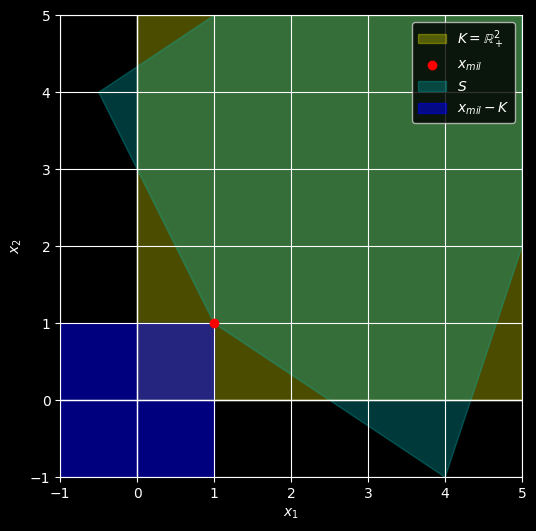

In [ ]:
fig_5, ax_5 = plt.subplots(figsize=(6, 6))

# Define cone C (R_+^2)
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
ax_5.fill_between(x, 0, 5, color='yellow', alpha=0.3, label='$K = \\mathbb{R}_+^2$')

# x_mil
x_mil = np.array([1, 1])
ax_5.scatter(*x_mil, color='red', label='$x_{mil}$', zorder=5)

# S as a polygon
S_vertices = np.array([[1, 1], [-0.5, 4], [1,5], [5,5], [5,2], [4, -1]])
ax_5.fill(S_vertices[:, 0], S_vertices[:, 1], color='c', alpha=0.3, label='$S$')

# Visualize S \cap (x_{mil} - C)
intersection_points = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1]])
ax_5.fill(
    intersection_points[:, 0],
    intersection_points[:, 1],
    color='blue',
    alpha=0.5,
    label='$x_{mil} - K$')

ax_5.set_xlim(-1, 5)
ax_5.set_ylim(-1, 5)
ax_5.axhline(0, color='w', linewidth=1)
ax_5.axvline(0, color='w', linewidth=1)
ax_5.set_xlabel('$x_1$')
ax_5.set_ylabel('$x_2$')
ax_5.legend()
ax_5.grid(True)
ax_5.set_aspect('equal', adjustable='box')

plt.show()

$$(x\in S, x_{mil} \geq_K x \Rightarrow x=x_{mil}) \Longleftrightarrow S \cap (x_{mil}-K) = \{x_{mil}\}$$

* $x\in S, x_{mil} \geq_K x \Rightarrow x=x_{mil}$, this means that `no other element` in $S$ is `strictly less than` $x_{mil}$ under $K$
* $S \cap (x_{mil}-K) = \{x_{mil}\}$, this means that $x_{mil}$ is the only point in $S$ that cannot be `strictly lessened` by other $x$ in $S$ w.r.t. $K$

Minimal elements `may not be not unique`

#### `Dual` cone

The dual cone $K^*$ of `any arbitrary cone` $K$ is defined as

$$K^* = \{y | y^Tx \geq 0, \forall x\in K\}$$

Examples
* $K=R^n_+ \rightarrow K^*=\mathbf{R}^n_+$
* $K=S^n_+ \rightarrow K^*=S^n_+$
* $K=\{(x,t)|\|x\|_2\leq t\} \rightarrow K^*=\{(x,t)|\|x\|_2\leq t\}$
* $K=\{(x,t)|\|x\|_1\leq t\} \rightarrow K^*=\{(x,t)|\|x\|_{\infty}\leq t\}$

Dual cones of `proper cones` are also `proper`, therefore

$$y\geq _{K^*} 0 \Longleftrightarrow y^Tx\geq 0, \forall x\geq_K 0$$

This can be seen from generalized inequality defined by a proper cone $K$

$$x\leq_K y \Longleftrightarrow y-x\in K$$

based on which we have

* $y\geq_{K^*} 0 \Rightarrow y\in K^*$
* $x\in K\Rightarrow  x\geq_{K} 0$ \
$\Rightarrow y^Tx\geq 0, \forall x\geq_K0$

and

* $x\geq_{K} 0 \Rightarrow x\in K$
* $y^Tx\geq 0, \forall x\in K$\
$\Rightarrow y\in K^* \Rightarrow y\geq_K^* 0$